In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", palette="pastel")
plt.rcParams['figure.dpi'] = 96

sns.set_context("paper")

In [2]:
df_usa = pd.read_csv("Yan_reply_First_last_wtime.csv")

df_chinese = pd.read_excel("time_series_375_prerpocess_en.xlsx", index_col=[0, 1])
df_chinese = df_chinese.groupby('PATIENT_ID').last()

In [3]:
df_usa.head()

,ClientVisitGUID,Expired_Outcome,Last_LDH,Last_CRP,Last_Lymph,First_LDH,First_CRP,First_Lymph,Last_time_LDH,Last_time_CRP,Last_time_Lymph,First_time_LDH,First_time_CRP,First_time_Lymph
0,1298314042,1,641,57.5,4.5,598,54.30,4.5,2 days 11:12:59,0 days 05:24:53,1 days 21:43:56,2 days 15:51:00,2 days 15:49:10,1 days 21:43:57
1,231729013,1,334,100.4,0.9,334,223.60,0.9,4 days 23:49:43,2 days 23:51:48,6 days 17:33:16,4 days 23:49:43,4 days 22:42:30,35 days 22:23:14
2,292613519,1,742,168.2,2.8,525,16.77,8.1,0 days 03:04:19,0 days 03:04:10,-1 days +23:56:08,14 days 15:58:27,15 days 18:47:49,11 days 00:51:43
3,1624500118,1,613,19.3,0.9,296,19.30,22.1,0 days 08:42:44,2 days 14:31:34,0 days 10:37:16,5 days 00:35:01,2 days 14:31:34,24 days 22:08:05
4,1101470227,1,271,25.1,2.6,374,46.70,5.4,0 days 23:21:10,-1 days +22:54:57,-1 days +20:35:07,24 days 13:05:59,24 days 13:28:36,27 days 01:15:44


In [4]:
df_usa["ldh_mean"] = (df_usa["Last_LDH"] + df_usa["First_LDH"]) / 2
df_usa["crp_mean"] = (df_usa["Last_CRP"] + df_usa["First_CRP"]) / 2

In [5]:
df_usa.shape

(1038, 16)

In [6]:
df_chinese.head()

,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,131.0,100.0,12.4,0.09,...,32.3,38.9,2.6,0.09,142.7,0.16,41.0,30.0,74.7,88.0
2,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,1.9,149.0,98.1,12.3,0.09,...,32.2,36.0,27.4,NaN,137.4,0.27,40.0,22.0,94.6,74.0
3,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,NaN,126.0,102.2,13.6,0.06,...,33.3,34.8,3.6,0.10,143.2,0.23,29.0,67.0,84.6,64.0
4,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,4.8,103.0,103.1,16.3,0.38,...,39.2,NaN,14.5,0.11,144.2,0.27,72.0,26.0,74.2,88.0
5,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,5.6,130.0,102.2,14.6,0.02,...,30.0,NaN,0.8,0.08,143.6,0.36,11.0,18.0,122.8,54.0


In [7]:
df_chinese.shape

(375, 79)

### Target class distribution

In [8]:
df_usa["Expired_Outcome"].value_counts()

0    678
1    360
Name: Expired_Outcome, dtype: int64

In [9]:
df_chinese["outcome"].value_counts()

0    201
1    174
Name: outcome, dtype: int64

### Lactate dehydrogenase

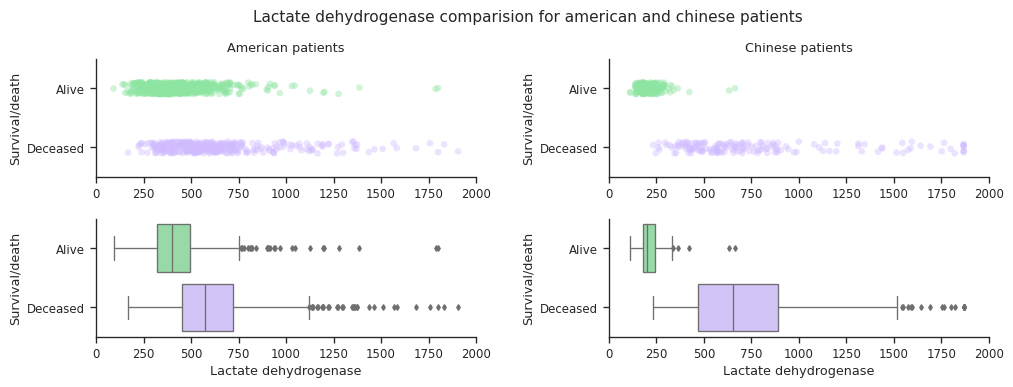

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("Lactate dehydrogenase comparision for american and chinese patients")

sns.stripplot(x="ldh_mean", y=df_usa["Expired_Outcome"].astype(str),
              data=df_usa, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][0], order=["0", "1"])
ax[0][0].set_title("American patients")
ax[0][0].set(xlim=(0, 2000))
ax[0][0].set(xlabel="")
ax[0][0].set(ylabel="Survival/death")
ax[0][0].set_yticklabels(["Alive", "Deceased"])

sns.stripplot(x="Lactate dehydrogenase", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][1], order=["0", "1"])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 2000))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")

sns.boxplot(y=df_usa["Expired_Outcome"].astype(str), x="ldh_mean", data=df_usa, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3, order=["0", "1"])
ax[1][0].set(xlim=(0, 2000))
ax[1][0].set(xlabel="Lactate dehydrogenase")
ax[1][0].set(ylabel="Survival/death")
ax[1][0].set_yticklabels(["Alive", "Deceased"])

sns.boxplot(y=df_chinese["outcome"].astype(str), x="Lactate dehydrogenase", data=df_chinese, ax=ax[1][1], palette=["g", "m"],linewidth=1, fliersize=3, order=["0", "1"])
ax[1][1].set(xlim=(0, 2000))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

sns.despine()
fig.savefig('ldh_usa.png', dpi=fig.dpi)
plt.show()

#### C-reactive protein

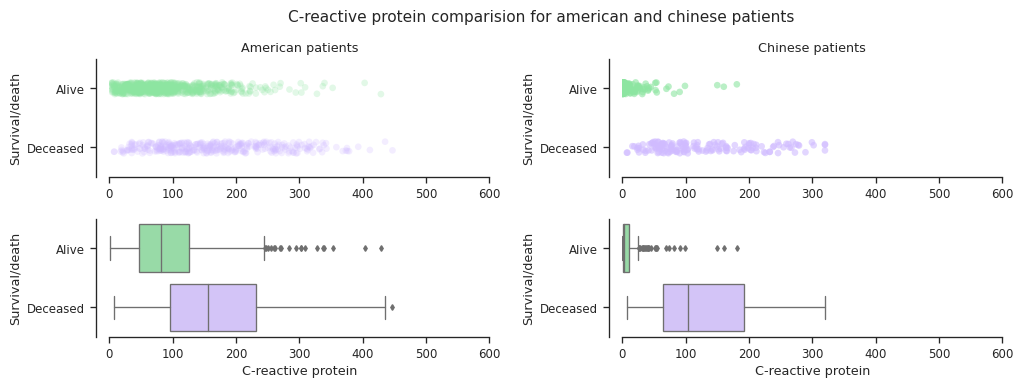

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("C-reactive protein comparision for american and chinese patients")

sns.stripplot(x="crp_mean", y=df_usa["Expired_Outcome"].astype(str),
              data=df_usa, dodge=True, alpha=.25, zorder=1, palette=["g", "m"], ax=ax[0][0], order=["0", "1"])
ax[0][0].set_title("American patients")
ax[0][0].set(xlim=(0, 600))
ax[0][0].set(ylabel="Survival/death")
ax[0][0].set_yticklabels(["Alive", "Deceased"])
ax[0][0].set(xlabel="")

sns.stripplot(x="High sensitivity C-reactive protein", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.6, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 600))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")


sns.boxplot(y=df_usa["Expired_Outcome"].astype(str), x="crp_mean", data=df_usa, ax=ax[1][0], palette=["g", "m"], order=["0", "1"], linewidth=1, fliersize=3)
ax[1][0].set(xlim=(0, 600))
ax[1][0].set(ylabel="Survival/death")
ax[1][0].set_yticklabels(["Alive", "Deceased"])
ax[1][0].set(xlabel="C-reactive protein")


sns.boxplot(y=df_chinese["outcome"].astype(str), x="High sensitivity C-reactive protein", data=df_chinese, ax=ax[1][1], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][1].set(xlim=(0, 600))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])
ax[1][1].set(xlabel="C-reactive protein")

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

sns.despine(offset={'left': 10})
fig.savefig('crp_usa.png', dpi=fig.dpi)

plt.show()